# 11/16 BIGDATA 분석2-(1) 데이터 정제 연습 및 그래프 분석

# 모듈 import

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [87]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Serif',
 'cmex10',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmtt10',
 'cmss10',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'Liberation Sans',
 'Ubuntu',
 'Sarai',
 'padmaa',
 'padmaa',
 'NanumMyeongjo',
 'Ubuntu',
 'Noto Mono',
 'NanumGothic Eco',
 'FreeMono',
 'Lohit Malayalam',
 'KacstOne',
 'Ubuntu Condensed',
 'Lohit Odia',
 'Manjari',
 'Tlwg Typist',
 'NanumBarunGothic',
 'Saab',
 'NanumSquare',
 'Ubuntu',
 'aakar',
 'Lohit Kannada',
 'Ubuntu',
 'Norasi',

In [88]:
plt.rcParams['font.family']='NanumGothic'

### 결측데이터 read_csv로 불러오기

In [89]:
df_raw= pd.read_csv("/home/piai/Downloads/FITNESS_결측.csv",engine='python',encoding='CP949')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [90]:
df_raw.isna().head()
#isna() 함수와 isnull() 과 같은역할

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [91]:
df_raw.isnull().sum()
#GENDER 는 범주형 데이터 , WEIGHT 연속형 데이터

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [92]:
df_raw.info()
# 데이터 타입 및 null개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


### STEP2. 범주형(문자)변수 결측치 처리: GENDER 변수의 결측치에 "여성"으로 대체

In [93]:
df_raw['GENDER'].fillna("여성", inplace= True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


## 결측치 "여성"으로  대체결과 확인

In [94]:
df_count = df_raw["GENDER"].value_counts()
df_count

여성    16
남성    15
Name: GENDER, dtype: int64

### STEP2. 범주형(문자)변수 결측치 처리: GENDER별 WEIGHT 평균 계산, 대체

In [95]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

## STEP2. 연속형(숫자)변수 결측치 처리
### * WEIGHT 변수의 결측치를 GENDER= '남성'의 WEIGHT 평균값으로 대체

In [96]:
df_raw["WEIGHT"]=df_raw["WEIGHT"].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform("mean")).round(3)

df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [97]:
df_raw.isnull().sum()
#대체후 null값 여부를 재확인

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

# STEP3. 이상치 확인 및 처리: 상자 수염도표를 이용한 이상치 확인

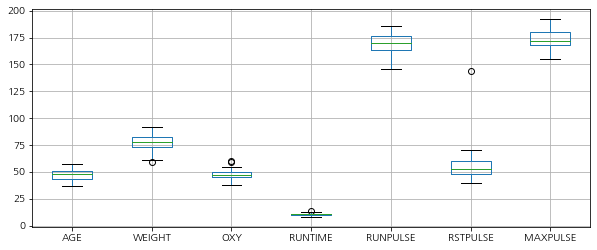

In [98]:
#boxplot:상자수염도 , figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize=(10,4))
# RSTPULSE 변수에 이상치 포함 확인 => 100보다 큰 값은 이상치로 판단

### STEP3. 이상치 확인 및 처리: 조건에 해당하는 자료 직접 확인

In [99]:
df_raw["RSTPULSE"]>=100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [100]:
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


## STEP3. 이상치 확인 및 처리: 이상치 제거 후 저장

In [101]:
df_fitness = df_raw[df_raw["RSTPULSE"]<100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [102]:
df_fitness.reset_index(drop=True, inplace = True)
df_fitness
# 인덱스 재설정 

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


## STEP4. Scale 변환 : scale 변환 대상 변수 = 숫자형 벼수(문자형 변수는 적용 안됨)

In [103]:
df_fitness_num = df_fitness.select_dtypes(exclude='object')
df_fitness_num.head()
## select_dtypes 조건으로 변수유형 선택 : select_dtypes = 'object'

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [104]:
df_fitness_char = df_fitness.select_dtypes(include = 'object')
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


## STEP4. Scale 변환(평균, 표준편차): 평균 =0 , 표준편차 =1 기준 변환

In [105]:
df_scale_std = scale(df_fitness_num)
df_scale_std=pd.DataFrame(df_scale_std,columns = df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [106]:
df_scale_desc = df_scale_std.describe()

In [107]:
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


## STEP4. Scale 변환(최소-최대)

In [108]:
#scale변환: 최소 , 최대값 기준
df_scale_minmax= minmax_scale(df_fitness_num)
# scale적용/변환하면 numpy의 ndarray형태로 저장 -> DataFrame 으로 변환
df_scale_minmax= pd.DataFrame(df_scale_minmax,columns=df_fitness_num.columns)
df_scale_minmax.head()
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## STEP4. Scale 변환(로버스트)

In [109]:
df_scale_robust=robust_scale(df_fitness_num)
df_scale_robust=pd.DataFrame(df_scale_robust,columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [110]:
df_scale_desc=df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


## STEP4. Scale 변환 결과비교

In [111]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"]= df_fitness_num['RSTPULSE']
df_rstpulse["Standard"]= df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"]=df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"]=df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860b6147f0>,
      dtype=object)

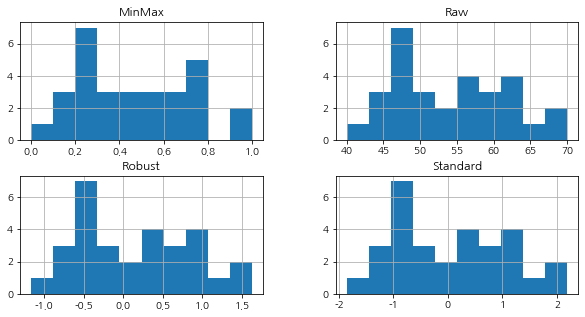

In [112]:
#pandasd 의 dataframe.hist 이용(figsize=(x축크기, y축크기))
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize=(10,5))

# 탐색적 분석_공통 연습

In [113]:
#그래프 분석
df_fitness =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/FITNESS.csv",engine='python',encoding='cp949')
df_fitness.head()
#FITNESS 데이터 가져오기

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [114]:
#환율 데이터 가져오기
df_currency =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/환율.csv",engine='python',encoding='cp949',parse_dates=['APPL_DATE'])

df_currency.head()
# 환율 데이터 head() 함수를 이용하여 5개 출력하기

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


# 그래프 분석_BAR Chart 

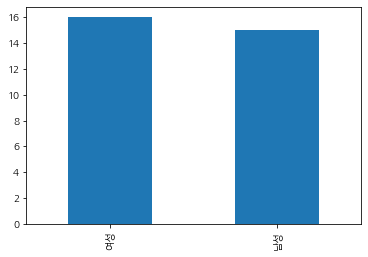

In [125]:
# fitness데이터프레임에서 GENDER 성별 의 갯수를 세고 plot.bar()를 이용하여 출력
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

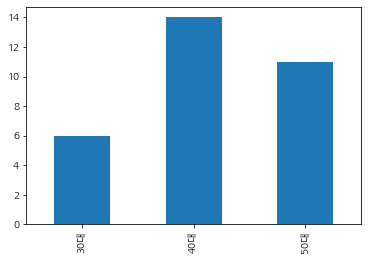

In [129]:
#fitnessDataFrame에서 나이그룹별 갯수를 세고 index를 inplace=true를 사용하여 나이순서로 정렬한다. inplace=True를 사용하지
# 않으면 데이터가 많은순인 
df_count= df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

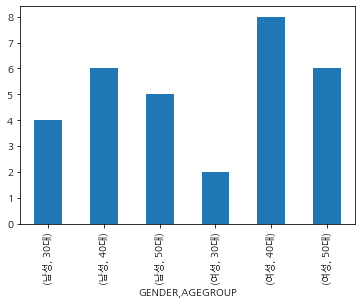

In [167]:
# 여성 40대의 빈도가 가장 많고, 여성 30대의 빈도가 가장 적다.
df_groupby_total=df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False).size()
df_groupby_total.plot.bar()

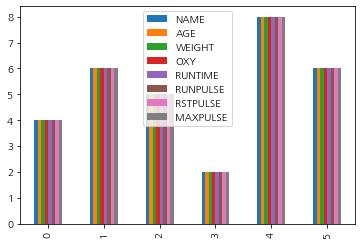

In [168]:
df_groupby_total=df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False).agg('count')
df_groupby_total.plot.bar()

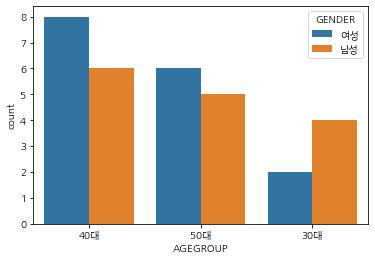

In [119]:
sns.countplot(x='AGEGROUP', hue= 'GENDER', data=df_fitness, order = df_fitness['AGEGROUP'].value_counts().index)

## 그래프 분석_Histogram

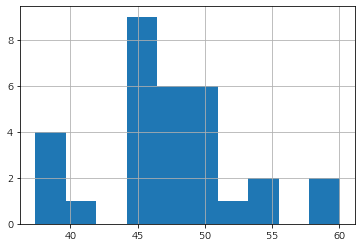

In [120]:
df_fitness['OXY'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860b190100>,
      dtype=object)

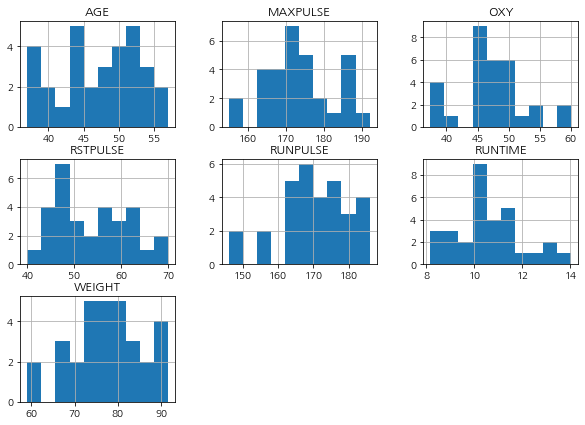

In [121]:
df_fitness.hist(figsize=(10,7))

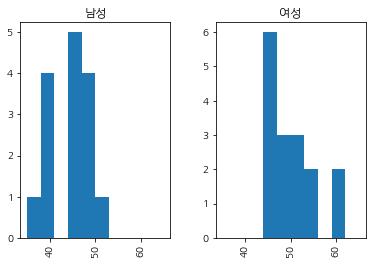

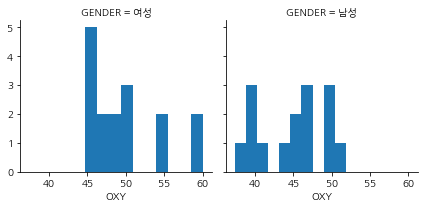

In [122]:
df_fitness.hist(column='OXY',by='GENDER',range=(35,65))
grid = sns.FacetGrid(df_fitness,col = 'GENDER')

grid.map(plt.hist,'OXY')

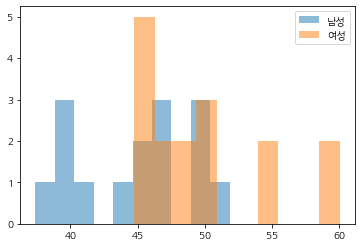

In [123]:
plt.hist(df_fitness[df_fitness['GENDER']=='남성']['OXY'], label = '남성', alpha= 0.5)
plt.hist(df_fitness[df_fitness['GENDER']=='여성']['OXY'], label = '여성', alpha= 0.5)
plt.legend()

In [173]:
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


Text(0.5, 1.0, '여성 vs 남성, 혈당 산소요구량')

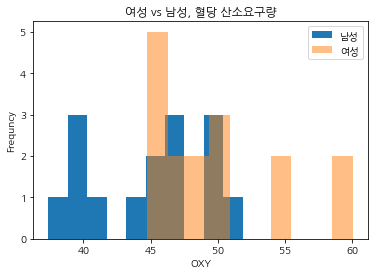

In [136]:
plt.hist(df_fitness[df_fitness['GENDER']=='남성']['OXY'], label = '남성', alpha= 1)
plt.hist(df_fitness[df_fitness['GENDER']=='여성']['OXY'], label = '여성', alpha= 0.5)
plt.legend()
plt.xlabel('OXY')
plt.ylabel('Frequncy')
plt.title('여성 vs 남성, 혈당 산소요구량')

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

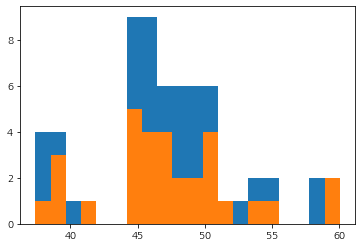

In [175]:
plt.hist(x='OXY',data=df_fitness)
plt.hist(x='OXY',data=df_fitness,bins=20)

## step5 : histogram 생성: x축의 구간(bin)수를 변경

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

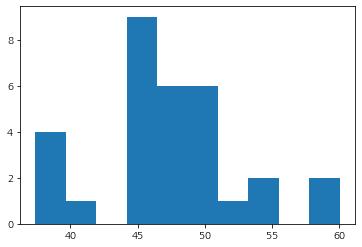

In [142]:
plt.hist(x='OXY', data= df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

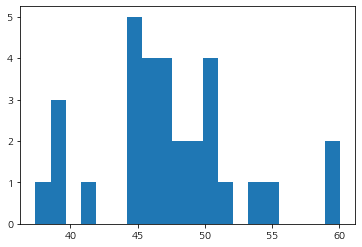

In [143]:
plt.hist(x='OXY', data=df_fitness, bins=20)

# 그래프 분석_Box Plot

## Step 1 Box Plot 생성: 성별 + 연령대 혈당 산소 요구량 분포

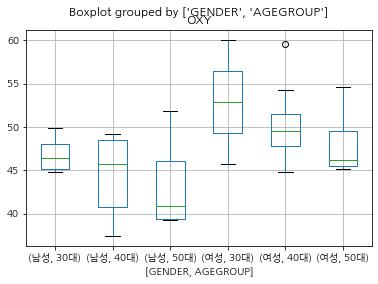

In [146]:
df_fitness.boxplot(column='OXY',by=['GENDER','AGEGROUP'])

# 여성이 남성보다 수준이 높고 또한 연령대가 증가할 수록 수준이 낮아지는 경향이 있음.

## Step 1 Pie Chart 생성: 성별, 성별+연령대

GENDER
남성    15
여성    16
dtype: int64


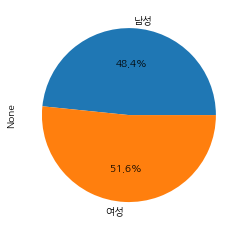

In [178]:
# groupby(column):column 기준 자료 요약.(size: group 별 자료 수 )
df_count= df_fitness.groupby(['GENDER']).size()
# pie(데이터, labels=레이블 변수 지정, autopct=비율 %로 표시(%.1f%%:소수점 1자리 적용)
print(df_count)
df_count.plot.pie(y='OXY',autopct='%.1f%%')


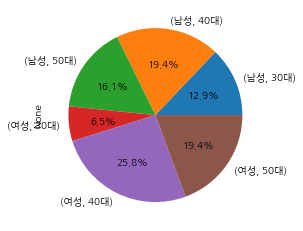

In [154]:
#성별 + 연령대 Pie chart
#group(column):column기준 자료 요약(size:group별 자료 수)
df_count=df_fitness.groupby(['GENDER','AGEGROUP']).size()
#pie(데이터,labes=레이블 변수 지정, autopct=비율 %로 표시)
df_count.plot.pie(y='OXY',autopct='%.1f%%')

# 그래프 분석_Scatter plot

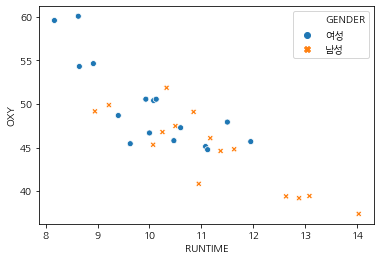

In [180]:
#성별로 운동시간과 혈당 산소 요구량
sns.scatterplot(x='RUNTIME', y="OXY",hue="GENDER", style='GENDER', data=df_fitness)
# hue: 그룹 변수 , stlye: 그룹별 maker 구분

## STEP 1. Scatter Matrix 생성

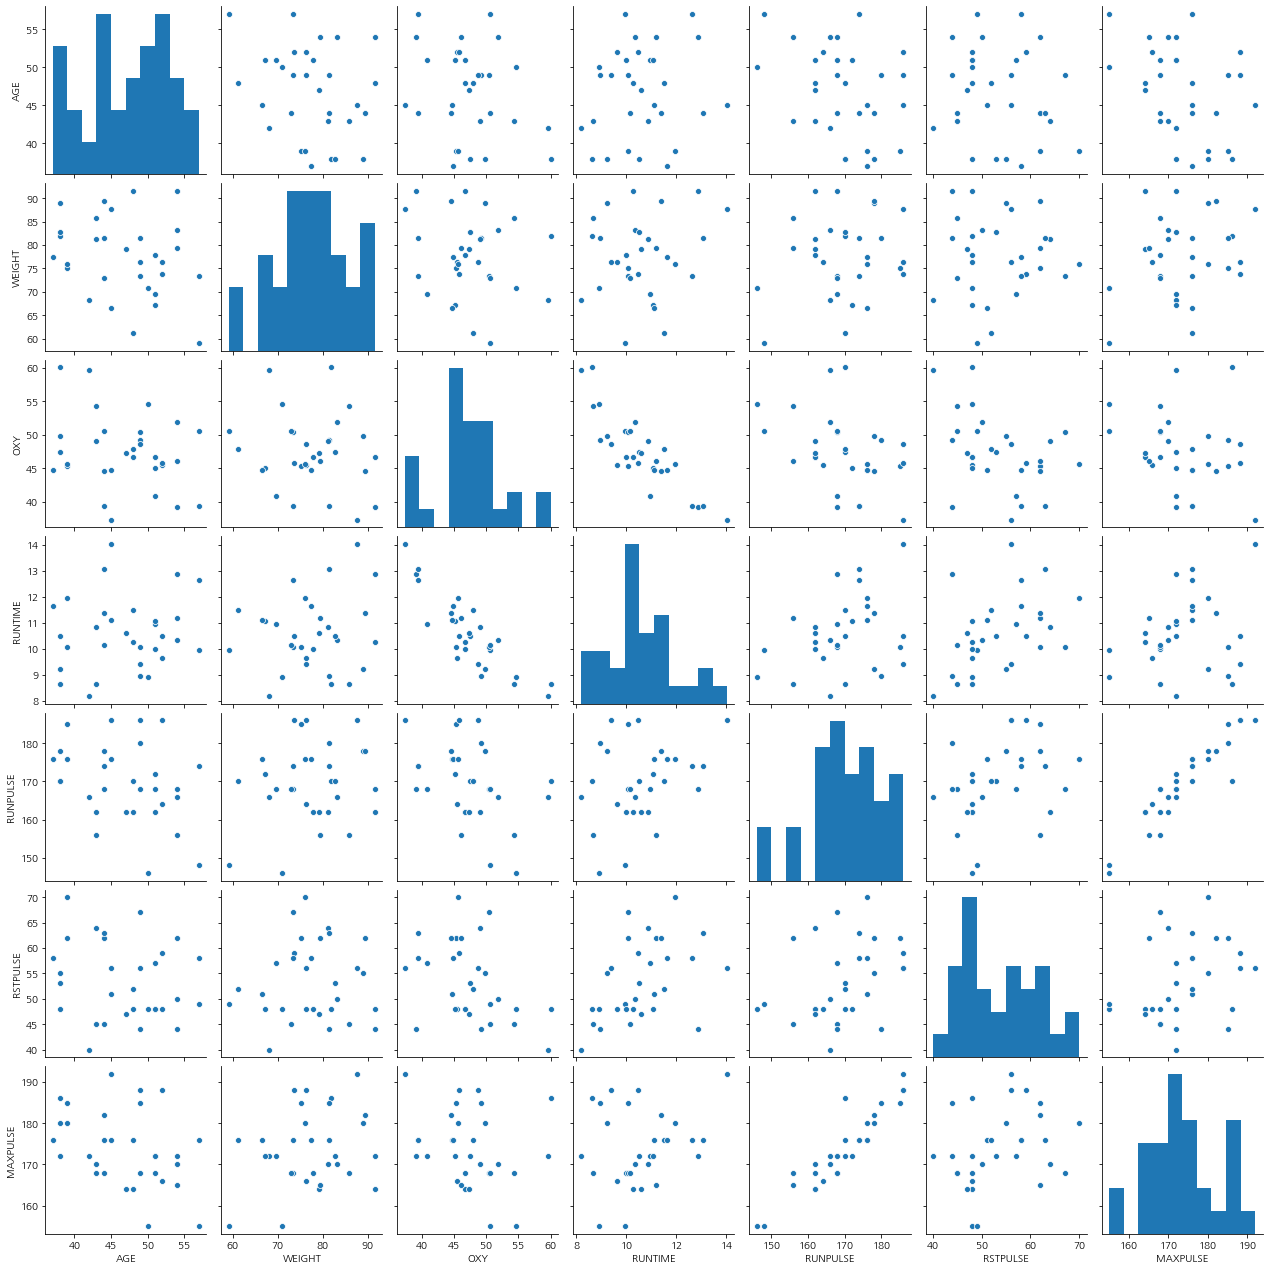

In [158]:
sns.pairplot(df_fitness)

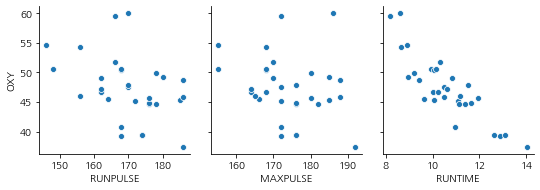

In [170]:
sns.pairplot(df_fitness, y_vars=['OXY'], x_vars=['RUNPULSE','MAXPULSE',"RUNTIME"])

# 그래프 분석_Trend Chart
## STEP 1. Trend Chart생성 : 통화별로 매매 기준율

In [162]:
df_currency_pivot=df_currency.pivot(index='APPL_DATE',columns='CURRENCY',values='STD_RATE')
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


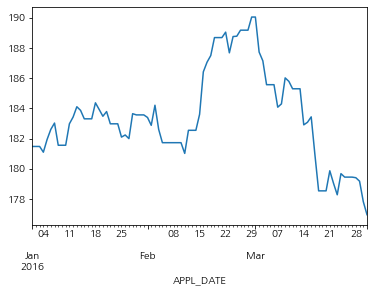

In [164]:
df_currency_pivot['CNY'].plot()

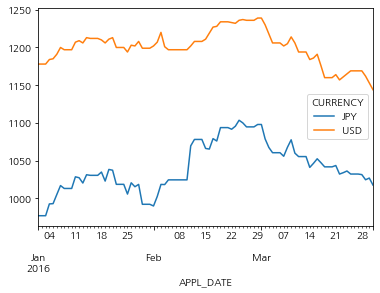

In [165]:
df_currency_pivot[['JPY','USD']].plot()

# 그래프 분석 _Heatmap

In [191]:
#성별과 연령대별 혈당 산소 요구량 평균 계산, groupby:(성별, 연령),agg('mean'):혈당 산소 요구량 평균값
df_agg = df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False).agg('mean')
#pivot(성별,연령대,혈당 산소 요구량) : x축(연령대, y축(성별),값(혈당산소요구량 평균)으로 pivot
df_pivot = df_agg.pivot('GENDER','AGEGROUP','OXY')
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


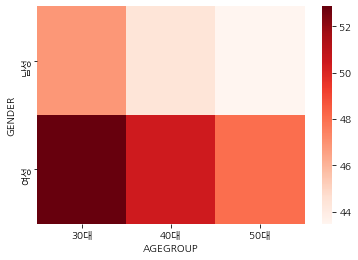

In [194]:
# heatmap (데이터, cmap:색상)
sns.heatmap(df_pivot,cmap='Reds')


# 그래프 분석_Contour Plot
#### 정의: X,Y축의 연속형 자료 값을 등고선으로, 대응하는 Z값(목표값)을 색깔로 표현하는 그래프
#### - 자료의 분포 밀도, 변화 및 패턴 확인
#### -활용 용도: 영역별 자료 변화 및 특정 영역 이상확인, 영향인자 변화에 따른 최적 조건 영역 탐색

### [연습] 아래는 운동에 따른 혈당 산소 요구량 데이터이다. 운동시간(RUNTIME)과 혈당 산소요구량
### (OXY)으로 Contour Plot을 생성하고 결과를 해석하시오. 데이터:FITNESS.CSV(변수:10개, 자료 수:31개) 

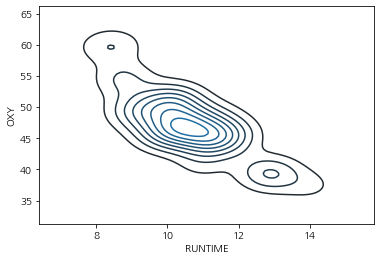

In [196]:
# kdeplot(x축, y축, shade: 음영 선택 여부)
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=False)
# 파이썬에서는 X,Y축 값에 따른 밀도 수준을 표현
##결과 : 혈당 산소 요구량은 (45~50), 운동 시간은 (10~12)범위에 많이 분포되어 있음

# 그래프 분석_Parallel Plot
#### 정의: 다수의 변수 수준(값)별 자료를 평면에 평행으로 표시하여 수준별 변화 경로, 패턴을 표현하는 그래프

#### - 변수 간의 변화 관계(방향성) 확인
#### - 활용용도: 변수별 분포, 변화 경로 및 패턴 확인

### 아래는 운동에 따른 혈당 산소 요구량 데이터이다. 성별에 따른 혈당 산소요구량, 몸무게, 휴식 시 맥박수의 관계를 Parallel Plot을 생성하고 결과를 해석하시오. 데이터 : FITNESS.CSV(변수:10개, 자료 수: 31개)

## STEP1 Parallel Plot 생성: 성별에 따른 혈당 산소 요구량, 몸무게, 휴식 시 맥박수

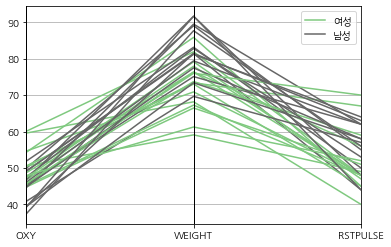

In [198]:
# parallel_coordinates(데이터, 그룹 변수, cols = 변수, colormap = 다양한 colormap  지정)
pd.plotting.parallel_coordinates(df_fitness,"GENDER",cols=['OXY','WEIGHT','RSTPULSE'],colormap="Accent")


# 그래프 분석_customizing
### STEP1 . Dashboard 생성

Text(486.6727272727271, 0.5, '혈당 산소 요구량')

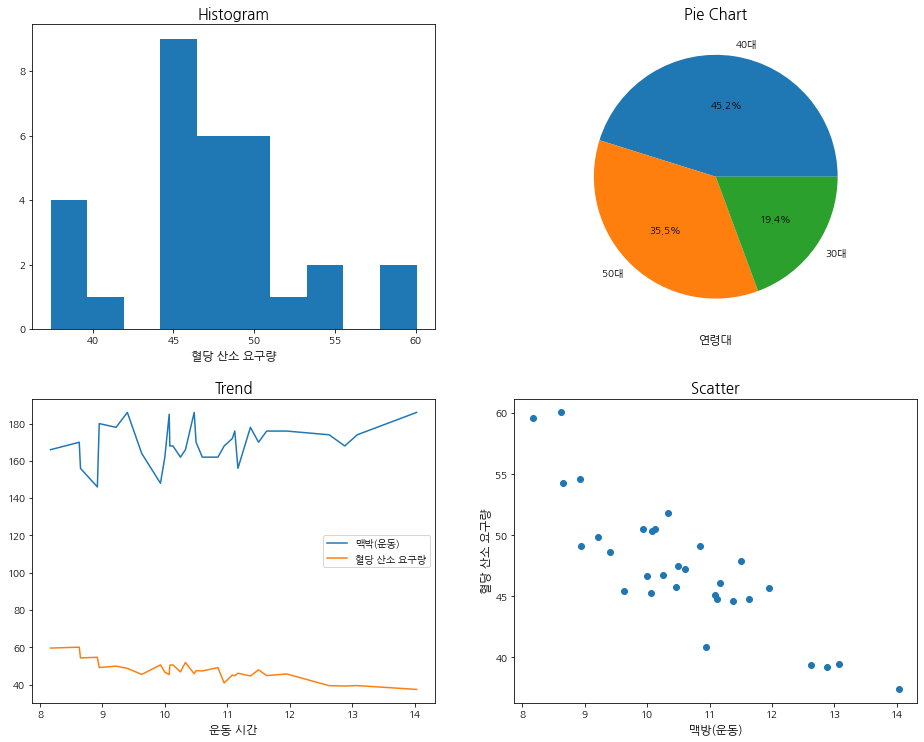

In [202]:
df_count= df_fitness["AGEGROUP"].value_counts()
fig,axes = plt.subplots(nrows=2,ncols=2, figsize= (13,10))
plt.tight_layout(w_pad=5,h_pad=5)
# Histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)
# Pie Chart
axes[0,1].pie(df_count,labels=df_count.index.tolist(), autopct='%.1f%%')
axes[0,1].set_title("Pie Chart", fontsize= 15)
axes[0,1].set_xlabel("연령대",fontsize=12)
#Trend
axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data = df_fitness,label="혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("운동 시간", fontsize =12)
axes[1,0].legend() ## 범례 표시
#Scatter
axes[1,1].scatter("RUNTIME","OXY",data=df_fitness) # [1,1] 위치에 산점도 표시, x축: 맥박(운동), y축:산소 요구량
axes[1,1].set_title("Scatter",fontsize=15)
axes[1,1].set_xlabel("맥방(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량",fontsize=12)

# 다양한 종류의 그래프를 customizing 하고 동시에 비교하여 분석할 수 있는 Dashboard 생성